In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel


file = open('readme','w+')
file.write('We have imported packages like pandas, numpy, seaborn, sklearn(for preprocesssing,sigmod_kernel and text feature extraction) and matplotlib')

139

In [99]:
credits = pd.read_csv('data/tmdb_5000_credits.csv')
movies = pd.read_csv('data/tmdb_5000_movies.csv')

file.write('We have considered two datasets credits and movies')

50

In [100]:
print(credits.shape)
print(credits.columns)

file.write('credit dataset - {shape:(4803,4), columns:[movie_id,title,cast,crew]}  ')

(4803, 4)
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


71

In [101]:
print(movies.shape)
print(movies.columns)

file.write('movies dataset - {shape:(4803,20), columns : [budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies,production_countries, release_date, revenue, runtime,spoken_languages, status, tagline, title, vote_average,vote_count] }')

(4803, 20)
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


285

In [102]:
print(movies.isnull().sum())
print(credits.isnull().sum())

file.write('Movies null values- [homepage : 3091, tagline : 844,overview : 3, release_date : 1, runtime : 2]')
file.write('Credits has no null values')

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
movie_id    0
title       0
cast        0
crew        0
dtype: int64


26

In [103]:
V = movies['vote_count']
R = movies['vote_average']
M = movies['vote_count'].quantile(0.70)
C = movies['vote_average'].mean()

movies['weighted_rating'] = (V/V+M * R) + (M/V+M * C)





file.write('weighted_rating for a movie = (V*R + M*C)/(V+M)')
file.write('[V:Total number of votes given to a movie, R: The rating of the movie, M: Minimum number of votes required to be in top 250, C: Mean Rating across whole report]')

160

# IMDB Weighted Average Based Recommendation System

71

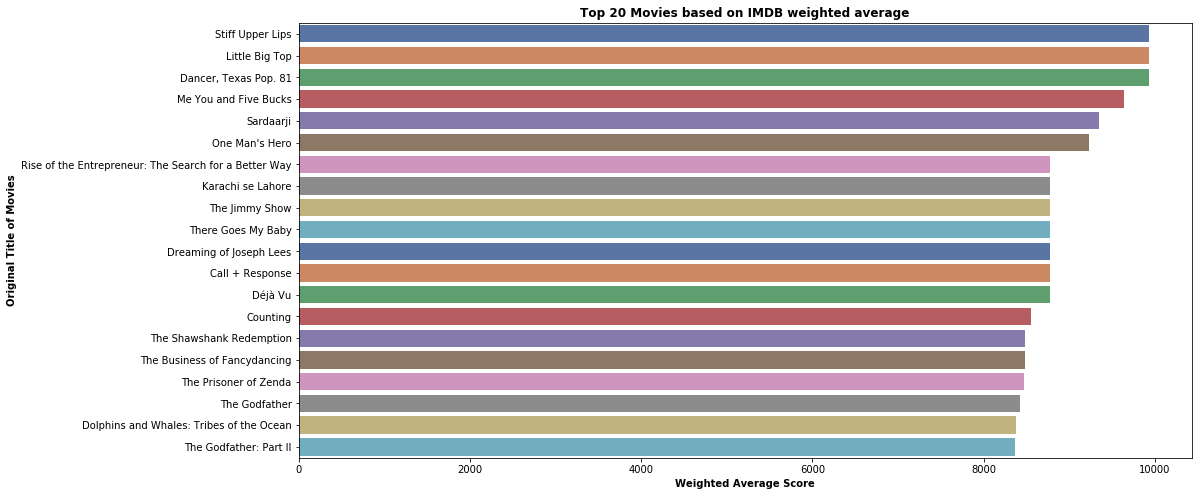

In [104]:
wavg = movies.sort_values(by='weighted_rating',ascending=False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x=wavg['weighted_rating'].head(20), y = wavg['original_title'].head(20),data=wavg, palette= 'deep' )
plt.title('Top 20 Movies based on IMDB weighted average',weight = 'bold')
plt.xlabel('Weighted Average Score',weight = 'bold')
plt.ylabel('Original Title of Movies', weight = 'bold')
plt.savefig('Top 20 Movies based on IMDB weighted average')



file.write('As we have calculated the weighted average, We would like to know the top 20 movies based on weighted average')
file.write('1. Sorted the records in the descending order based on weighted average of the movies')
file.write('2. We want to plot a figure of dimension 16x8 which we have initialized using figure')
file.write('3. We have plotted a bar chart using seaborn library of python, x-axis contains top 20 weighted ratings in descending order, y-axis contains top 20 movies based on average weights')
file.write('4. We have defined the x-axis label, y-axis label and the title in bold')

# Popularity Based Recommendation System

55

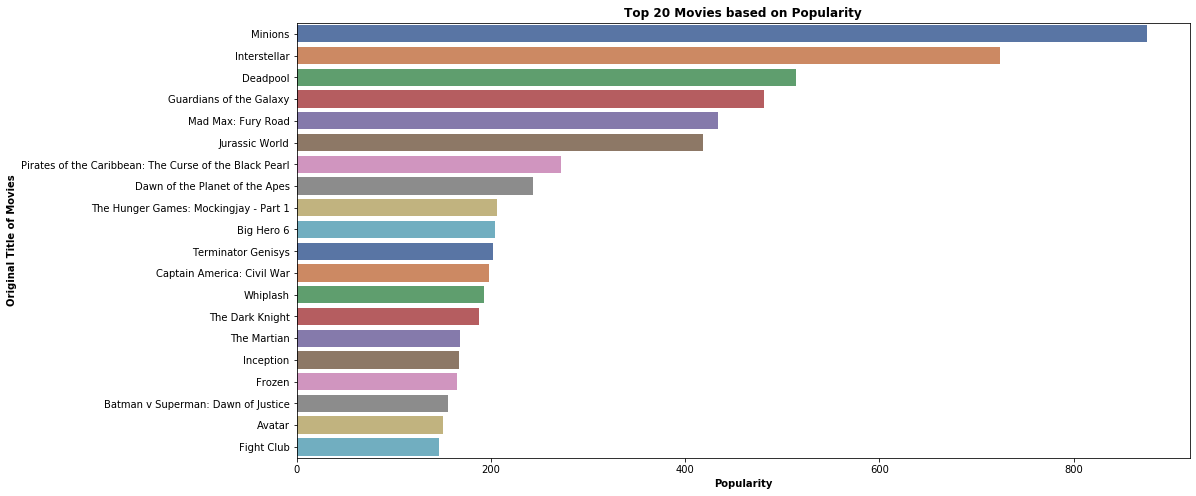

In [105]:
popular = movies.sort_values(by='popularity',ascending = False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x=popular['popularity'].head(20),y=popular['original_title'].head(20),data=popular,palette='deep')
plt.title('Top 20 Movies based on Popularity',weight = 'bold')
plt.xlabel('Popularity',weight = 'bold')
plt.ylabel('Original Title of Movies',weight = 'bold')
plt.savefig('Top 20 Movies based on Popularity')

file.write('Now we will plot a bar-chart for movies based on popularity')
file.write('1. Sort the records based on popularity column in descending order')
file.write('2. Initialize the figure dimension(16X8) using plt.figure\'s figsize argument')
file.write('3. X-axis contains first 20 popularity values and y-axis contains corresponding original names of the movies')
file.write('4. We have set the title as well as x and y labels as bold')
file.write('5. Lastly, we have saved the figure using plt\'s savefig' )

# Popularity and Weighted Average Based Recommendation System

51

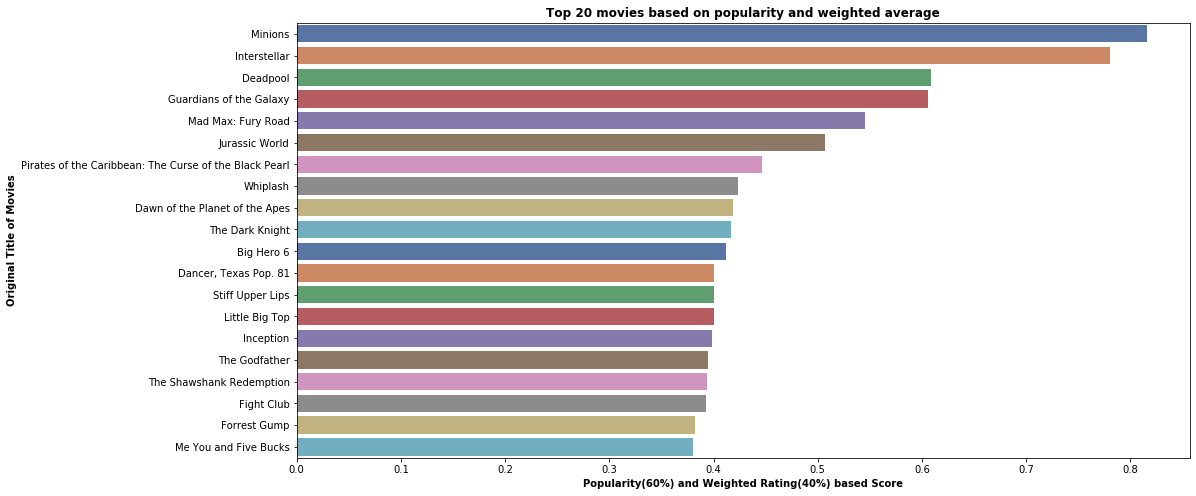

In [106]:
min_max_scaler = preprocessing.MinMaxScaler()
movies_scaled = min_max_scaler.fit_transform(movies[['weighted_rating','popularity']])
movies_norm = pd.DataFrame(movies_scaled, columns = ['weighted_rating','popularity']) 
movies['popularity_weighted_rating_score'] = 0.6*movies_norm.popularity + 0.4*movies_norm.weighted_rating
popularity_rating_blend = movies.sort_values(by = 'popularity_weighted_rating_score', ascending = False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x = popularity_rating_blend['popularity_weighted_rating_score'].head(20),y=popularity_rating_blend['original_title'].head(20),data=popularity_rating_blend,palette = 'deep')
plt.title('Top 20 movies based on popularity and weighted average',weight = 'bold')
plt.xlabel('Popularity(60%) and Weighted Rating(40%) based Score', weight = 'bold')
plt.ylabel('Original Title of Movies', weight = 'bold')
plt.savefig('Top 20 movies based on popularity and weighted average')


file.write('We would like to design a recommendation system based on popularity and weighted_rating, for that we will derive a score based on 60% popularity and 40% weighted average')
file.write('The steps to derive the score are as follows :')
file.write('1. We need to scale the values because we don\'t want our model to get affected by bigger range columns')
file.write('2. We will use MinMaxScaler from sklearn.preprocessing. We will initialize a MinMaxScaler object')
file.write('3. We will fit_transform columns weighted_average and popularity, this will return a list of list(having values)')
file.write('4. Now, we will define a dataframe movies_norm with columns weighted_rating and popularity')
file.write('5. We will then formulate a score as a column in movies dataframe(orginal dataframe), where 60% weightage is given to popularity and 40% weightage to weighted_average')
file.write('6. Now, we will sort the records in the movies dataframe according to these values in the descending order')
file.write('7. A figure of dimension 16X8 is initialized using plt.figure\'s figsize argument.')
file.write('8. Bar graph is plotted using the seaborn library where x-axis contains the top 20 scores(based on popularity and weighted_average) and y-axis contains original names of the movies')
file.write('9. Now, we set the title, x-label and y-label, all in bold.')
file.write('10. Lastly, we save the figure using plt.savefig().')

# Content Based Recommendation System

In [107]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
movies['overview'].fillna('',inplace=True)
tfv_matrix = tfv.fit_transform(movies['overview'])
tfv_matrix.shape



file.write('Now we will design Content Based Recommendation System, for that we will use TfidfVectorizer from sklearn.featuer_extraction.text library')
file.write('1. Define a TfidfVectorizer object where word_frequency is 3, stop_words are english and n_gram range is between 1,3')
file.write('2. There are null values in overview column(overview column in the movies dataset summarizes the plot of the movie), so we fill those values with empty string.')
file.write('3. Now we transform the overview column into tfidf matrix using fit_transform function of the TfidfVectorizer object.')
file.write('4. Shape of tfidf matrix is (4803, 10417).')

42

In [108]:
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
indices = pd.Series(movies.index, index=movies['original_title']).drop_duplicates()
#print(sig[1])
def recommendation(title, sig=sig):
    idx = indices[title]
    
    sig_scores = list(enumerate(sig[idx]))
    #print(sig_scores[1])
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    #print(sig_scores)
    sig_scores = sig_scores[1:21]
    movie_indices = [i[0] for i in sig_scores]
    return movies['original_title'].iloc[movie_indices]

file.write('We are using sigmoid kernel to calculate the similarity score')
file.write('Then we are mapping indices to the original movie titles such that original movie titles are the index')
file.write('Then we define a funciton recommendation that takes movie title as the argument and sigmoid_kernel_similarity as default argument, dimension of sig is 4803x4803')
file.write('sig[1] will give us similarity scores of movie with index one')
file.write('We extract the index of the movie passed to the function using indices dataframe')
file.write('We are enumerating the sig_scores at index 0 and then converting it to a list')
file.write('Now, we are sorting this list in the descending order on the basis of second content(index=1) of the tupule')
file.write('Now, we are taking into consideration top 20 sig_scores')
file.write('List movie indices contains index of movies with top 20 similarity scores.')
file.write('This function is returning the names of these top 20 movies')

59

In [109]:
recommendation('Avatar')

634                          The Matrix
1341                   Obitaemyy Ostrov
2130                       The American
775                           Supernova
3604                          Apollo 18
529                    Tears of the Sun
151                             Beowulf
942                    The Book of Life
311        The Adventures of Pluto Nash
36      Transformers: Age of Extinction
570                              Ransom
1610                              Hanna
3070            Jeff, Who Lives at Home
1784                          EverAfter
1033                           Insomnia
2578                         The Marine
150                     Men in Black II
847                            Semi-Pro
1013                           Child 44
3724                      Falcon Rising
Name: original_title, dtype: object